# Logistic Regression Plots

## Logistic Function


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from myst_nb import glue

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

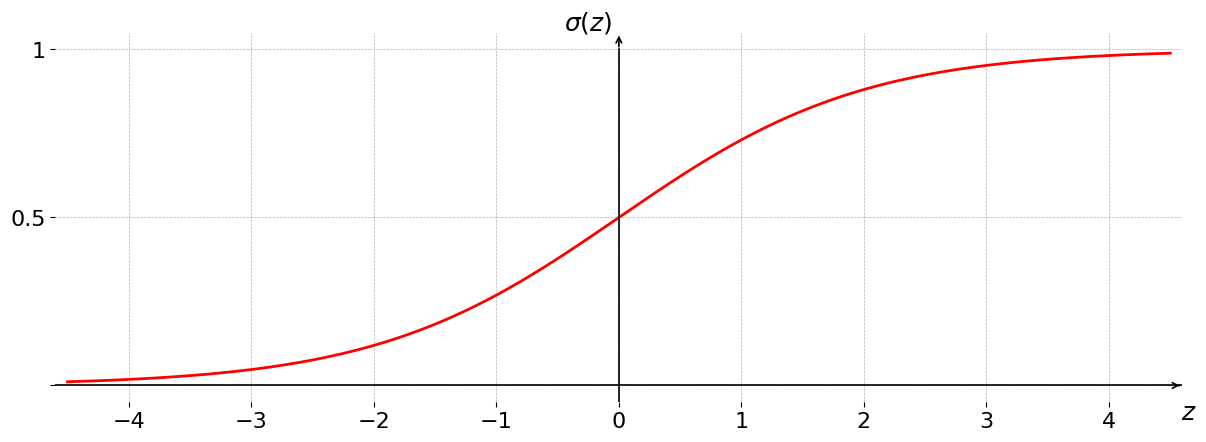

In [14]:
Z = np.linspace(-4.5, 4.5, 400)
sZ = sigmoid(Z)

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

fig = plt.figure(figsize=plt.figaspect(0.33))
ax = fig.add_subplot(111)

# Grid lines
ax.set_yticks([0, 0.5, 1])
ax.set_xticks(np.arange(-4, 5, 1))
ax.yaxis.grid(True, ls='--', lw=0.5)
ax.xaxis.grid(True, ls='--', lw=0.5)

# Clip horizontal grid at y=1
ax.set_ylim(-0.05, 1.0)
ax.set_xlim(-4.6, 4.6)

# Sigmoid curve
ax.plot(Z, sZ, c='r', lw=2)

# Hide spines
for spine in ["left", "bottom", "right", "top"]:
    ax.spines[spine].set_visible(False)

# Horizontal axis as black line + arrow
ax.plot([-4.6, 4.6], [0, 0], c='black', lw=1.2)
ax.annotate("", xy=(4.6, 0), xytext=(4.55, 0),
            arrowprops=dict(arrowstyle="->", lw=1.2, color="black"))

# Vertical axis as black line + arrow
ax.set_ylim(-0.05, 1.05)  # extend ylim slightly to show vertical arrow
ax.plot([0, 0], [-0.05, 1.0], c='black', lw=1.2)
# Arrowhead
ax.annotate("", xy=(0, 1.05), xytext=(0, 1.0),
            arrowprops=dict(arrowstyle="->", lw=1.2, color="black"))

# Axis labels
ax.text(4.65, -0.08, r"$z$", fontsize=18, ha="center", va="center")          
ax.text(-0.25, 1.08, r"$\sigma(z)$", fontsize=18, ha="center", va="center")  

# Hide 0.0 label on vertical
yticks = ax.get_yticks()
ax.set_yticklabels([("" if y == 0 else f"{y:g}") for y in yticks])

# Glue figure for Jupyter Book (optional)
glue("sigmoid_example", fig, display=False)

In [59]:
np.random.seed(0)
x = 10*np.random.rand(100)
mu = np.mean(x)
y = np.zeros(50)
y = [1 if xi > mu else 0 for xi in x]

x_grid = np.linspace(np.min(x), np.max(x), 50)
z = sigmoid(x_grid - mu)

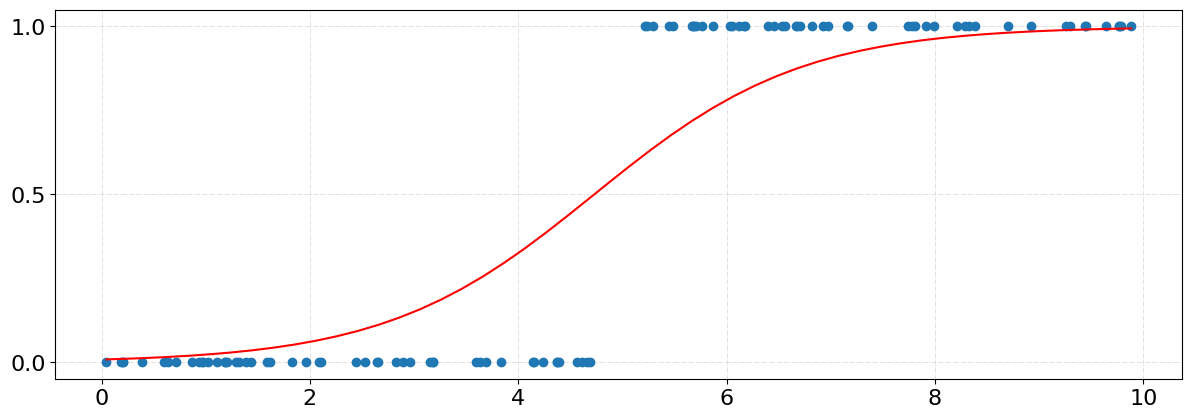

In [96]:
fig = plt.figure(figsize=plt.figaspect(0.33))
ax = fig.add_subplot(111)

ax.set_axisbelow(True)

# Horizontal grid line at 0.5
major_ticks = np.arange(0, 101, 0.5)
ax.set_yticks(major_ticks)
ax.grid(c="lightgrey",ls="-.",lw=0.5)

# Plot
ax.scatter(x, y)
ax.plot(x_grid, z, c='r')
#plt.show()


It's tough to draw a non convex function!
Ok trying this:


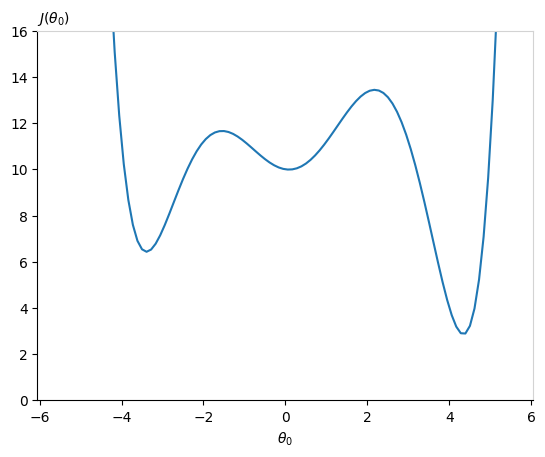

In [ ]:
x_pol = np.linspace(-5.5, 5.5, 100)
y_pol = ( x_pol**6 - 2*x_pol**5 - 26*x_pol**4 + 28*x_pol**3 + 145*x_pol**2 - 26*x_pol +1000 )/100

plt.rcParams.update(plt.rcParamsDefault)

fig, ax = plt.subplots(dpi=200)
ax.plot(x_pol,y_pol, lw=2)

ax.set_ylim([0, 16])
#ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')

ax.set_xlabel('$\\theta_0$')
#ax.set_ylabel('$\\theta_1$')
ax.set_title('$J(\\theta_0)$', loc='left', fontsize = 10)

glue("poly3minima_example", fig, display=True)





## Cost Function Logistic Regression

/var/folders/fv/74nv6gw915x5mgvq1t9sx__00000gn/T/ipykernel_8363/1756109242.py:2: RuntimeWarning: divide by zero encountered in log
  y = - np.log(x)
/var/folders/fv/74nv6gw915x5mgvq1t9sx__00000gn/T/ipykernel_8363/1756109242.py:3: RuntimeWarning: divide by zero encountered in log
  y2 = - np.log((1-x))


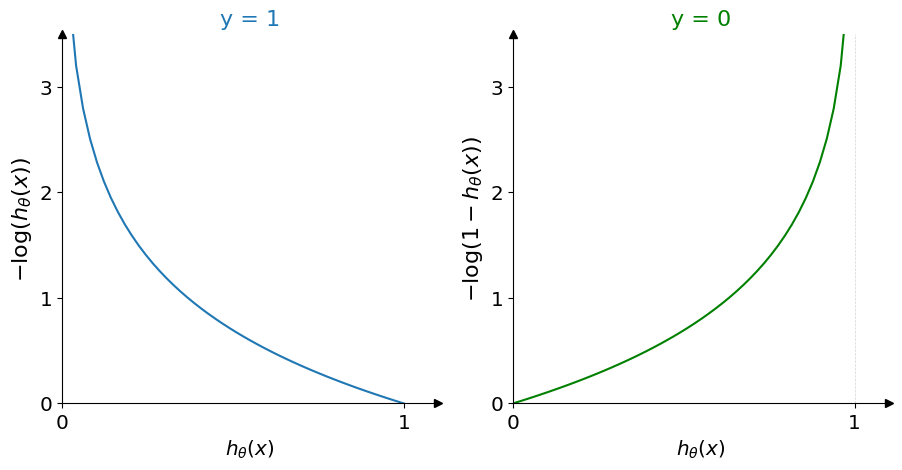

In [176]:
x = np.linspace(0,1,50)
y = - np.log(x)
y2 = - np.log((1-x))

fig , ax = plt.subplots(1, 2, figsize=plt.figaspect(0.45))
plt.setp(ax, xlim=(0,1.1), ylim=(0,3.5), xticks=np.arange(0, 1.1, 1), yticks=np.arange(0, 4, 1))

ax[0].plot(x,y)
ax[0].set_title("y = 1", c='C0', fontsize=16)
ax[0].set_xlabel('$h_\\theta(x)$')
ax[0].set_ylabel('$-\\log(h_\\theta(x))$', fontsize=16)

ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].plot(1, 0, ">k", transform=ax[0].get_yaxis_transform(), clip_on=False)
ax[0].plot(0, 1, "^k", transform=ax[0].get_xaxis_transform(), clip_on=False)

ax[1].plot(x,y2, c='green')
ax[1].set_title("y = 0", c='green', fontsize=16)
ax[1].set_xlabel('$h_\\theta(x)$')
ax[1].set_ylabel('$-\\log(1 - h_\\theta(x))$', fontsize=16)

ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].plot(1, 0, ">k", transform=ax[1].get_yaxis_transform(), clip_on=False)
ax[1].plot(0, 1, "^k", transform=ax[1].get_xaxis_transform(), clip_on=False)
ax[1].axvline(x=1, color='lightgrey', ls="--", lw=0.5)


glue("log_h_x", fig, display=False)